# Map of Bogotá with its jurisdictions and our grid


## 0. Import packages and data

In [7]:
# Beginning of code

# Load packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Import the administrative boundaries of Bogota
localidades = gpd.read_file("../../Data/localidades")
# Remove the rural area of Bogotá
filtro = ~localidades["LocNombre"].str.contains("SUMAPAZ")
bog = localidades.loc[filtro,].reset_index(drop = True)

# Import grid created in ./Scripts/1_preprocess_data/3_create_grid.ipynb
grilla_bog = pd.read_csv("../../Data/grilla_bogota.csv", sep = ";")
# Transform dataframe to geopandas
grilla_bog["geometry"] = gpd.GeoSeries.from_wkt(grilla_bog["geometry"])
grilla_bog["centroide"] = gpd.GeoSeries.from_wkt(grilla_bog["centroide"])
grilla_bog = gpd.GeoDataFrame(grilla_bog, geometry = 'geometry')

## 1. Create the map

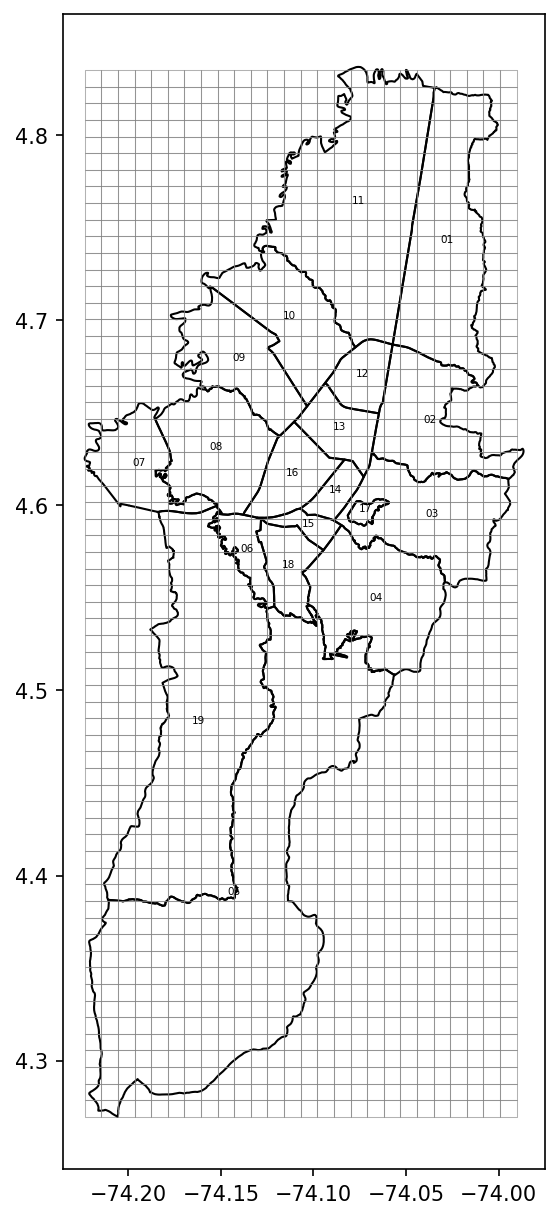

In [11]:
fig, ax = plt.subplots(figsize = (20, 10), dpi = 150)
bog.plot(ax = ax, color = 'none', edgecolor = 'black')
bog.apply(lambda x: ax.annotate(text=x['LocCodigo'], xy = x.geometry.centroid.coords[0], ha = 'center', fontsize = 5), axis = 1);
grilla_bog.plot(ax = ax, color = "none", edgecolor = "grey", linewidth = 0.5, alpha = 0.6)
plt.savefig(fname = '../../Outputs/Figures/figure_8_bogota_grilla.png')

In [10]:
# End of the code